# Библиотеки


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro, ttest_1samp
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import os

In [56]:
os.makedirs('../fig', exist_ok=True)

# Анализ для zad31

In [57]:
df_zad31 = pd.read_csv('ident_lab1/zad31_data.csv')
x_cols = [f'x_{i}' for i in range(1, 31)]
y_cols = [f'y_{i}' for i in range(1, 31)]
x_zad31 = df_zad31[x_cols].values[0]
y_zad31 = df_zad31[y_cols].values[0]

In [58]:
# Модель: y = A sin(5x) + B cos(5x) - линейна по параметрам A и B
X_zad31 = np.column_stack((np.sin(5 * x_zad31), np.cos(5 * x_zad31)))

# Оценка коэффициентов методом наименьших квадратов
model_zad31 = sm.OLS(y_zad31, X_zad31).fit()
A, B = model_zad31.params
residuals_zad31 = model_zad31.resid
predicted_zad31 = model_zad31.predict(X_zad31)

print(f"A = {A:.2f}, B = {B:.2f}")

A = -16.30, B = 8.11


In [59]:
# Нулевое среднее ошибок: E(res) = 0
# Проверка среднего остатков
mean_residuals = np.mean(residuals_zad31)
t_stat, p_value = ttest_1samp(residuals_zad31, 0)
print(f"Проверка нулевого среднего ошибок (zad31):")
print(f"Среднее остатков: {mean_residuals:.6f}")
print(f"t-тест для среднего: t={t_stat:.4f}, p-value={p_value:.6f}")
if p_value > 0.05:
    print("Нет оснований отвергнуть нулевую гипотезу о нулевом среднем остатков (условие выполняется)\n")
else:
    print("Есть основания отвергнуть нулевую гипотезу о нулевом среднем остатков (условие не выполняется)\n")


Проверка нулевого среднего ошибок (zad31):
Среднее остатков: -0.000000
t-тест для среднего: t=-0.2270, p-value=0.822041
Нет оснований отвергнуть нулевую гипотезу о нулевом среднем остатков (условие выполняется)



In [60]:
# Гомоскедастичность: постоянная дисперсия ошибок
# Тест Бреуша-Пагана
# Добавляем константу для теста Бреуша-Пагана
X_zad31_for_bp = sm.add_constant(X_zad31)  # Добавляем константу для теста
bp_test = het_breuschpagan(residuals_zad31, X_zad31_for_bp)
print(f"Проверка гомоскедастичности (zad31):")
print(f"Тест Бреуша-Пагана: statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Нет оснований отвергнуть гипотезу о гомоскедастичности (условие выполняется)\n")
else:
    print("Есть основания отвергнуть гипотезу о гомоскедастичности (условие не выполняется)\n")

Проверка гомоскедастичности (zad31):
Тест Бреуша-Пагана: statistic=1.0810, p-value=0.5824
Нет оснований отвергнуть гипотезу о гомоскедастичности (условие выполняется)



In [61]:
# Отсутствие автокорреляции: Cov(ε_i, ε_j) = 0 для i≠j
# Тест Дарбина-Уотсона и тест Льюнга-Бокса
dw_stat = sm.stats.durbin_watson(residuals_zad31)
lb_test = acorr_ljungbox(residuals_zad31, lags=[1], return_df=True)
print(f"Проверка автокорреляции (zad31):")
print(f"Статистика Дарбина-Уотсона: {dw_stat:.4f}")
print(f"Тест Льюнга-Бокса: LB-statistic={lb_test['lb_stat'].values[0]:.4f}, p-value={lb_test['lb_pvalue'].values[0]:.4f}")
if dw_stat > 1.5 and dw_stat < 2.5 and lb_test['lb_pvalue'].values[0] > 0.05:
    print("Нет признаков автокорреляции (условие выполняется)\n")
else:
    print("Есть признаки автокорреляции (условие не выполняется)\n")

Проверка автокорреляции (zad31):
Статистика Дарбина-Уотсона: 1.7270
Тест Льюнга-Бокса: LB-statistic=0.0391, p-value=0.8433
Нет признаков автокорреляции (условие выполняется)



In [62]:
# Отсутствие мультиколлинеарности: матрица X имеет полный ранг
# Вычисление VIF (Variance Inflation Factor)
vif = [variance_inflation_factor(X_zad31, i) for i in range(X_zad31.shape[1])]
print(f"Проверка мультиколлинеарности (zad31):")
print(f"VIF для sin(5x): {vif[0]:.4f}, VIF для cos(5x): {vif[1]:.4f}")
if max(vif) < 10:
    print("Мультиколлинеарность отсутствует (условие выполняется)\n")
else:
    print("Есть мультиколлинеарность (условие не выполняется)\n")

Проверка мультиколлинеарности (zad31):
VIF для sin(5x): 1.0000, VIF для cos(5x): 1.0000
Мультиколлинеарность отсутствует (условие выполняется)



In [63]:
# Нормальность остатков (для малых выборок)
# Тест Шапиро-Уилка
shapiro_test = shapiro(residuals_zad31)
print(f"Проверка нормальности остатков (zad31):")
print(f"Тест Шапиро-Уилка: statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Остатки нормально распределены (условие выполняется)\n")
else:
    print("Остатки не нормально распределены (условие не выполняется)\n")


Проверка нормальности остатков (zad31):
Тест Шапиро-Уилка: statistic=0.8630, p-value=0.0012
Остатки не нормально распределены (условие не выполняется)



In [64]:
print(model_zad31.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.285e+28
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                        0.00
Time:                        11:22:01   Log-Likelihood:                          842.02
No. Observations:                  30   AIC:                                     -1680.
Df Residuals:                      28   BIC:                                     -1677.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

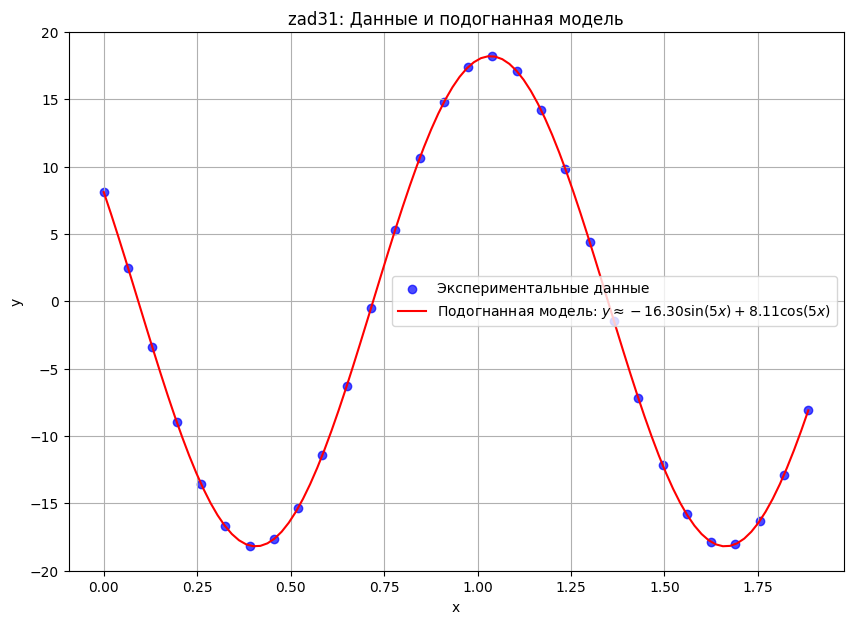

In [65]:
plt.figure(figsize=(10, 7))
x_smooth = np.linspace(min(x_zad31), max(x_zad31), 100)
y_fit = A * np.sin(5 * x_smooth) + B * np.cos(5 * x_smooth)
plt.scatter(x_zad31, y_zad31, label='Экспериментальные данные', color='blue', alpha=0.7)
plt.plot(x_smooth, y_fit, 'r-', 
         label=f'Подогнанная модель: $y \\approx {A:.2f}\\sin(5x) + {B:.2f}\\cos(5x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('zad31: Данные и подогнанная модель')
plt.legend()
plt.grid(True)
plt.savefig('../fig/zad31_data_fit.png', dpi=300)


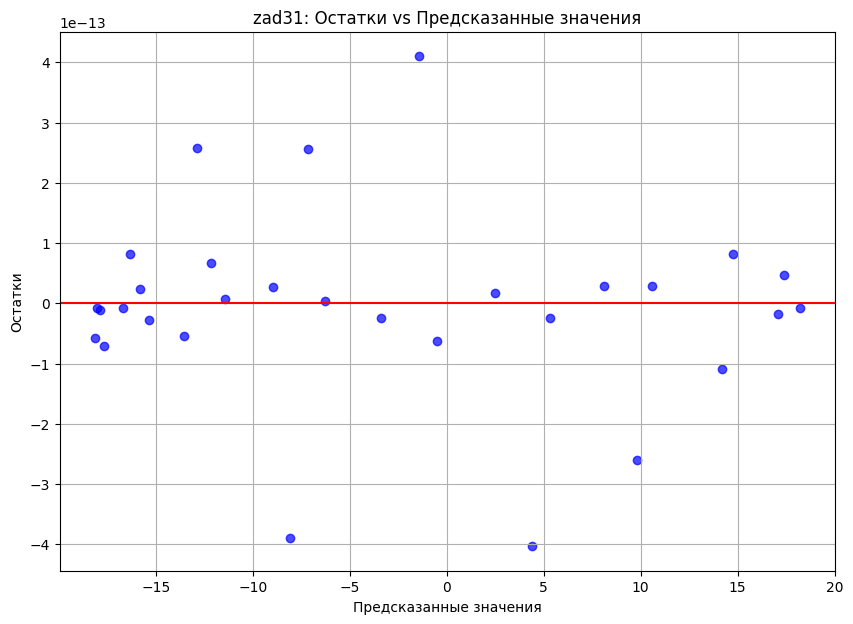

In [66]:
plt.figure(figsize=(10, 7))
plt.scatter(predicted_zad31, residuals_zad31, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('zad31: Остатки vs Предсказанные значения')
plt.grid(True)
plt.savefig('../fig/zad31_residuals_vs_predicted.png', dpi=300)

<Figure size 1000x700 with 0 Axes>

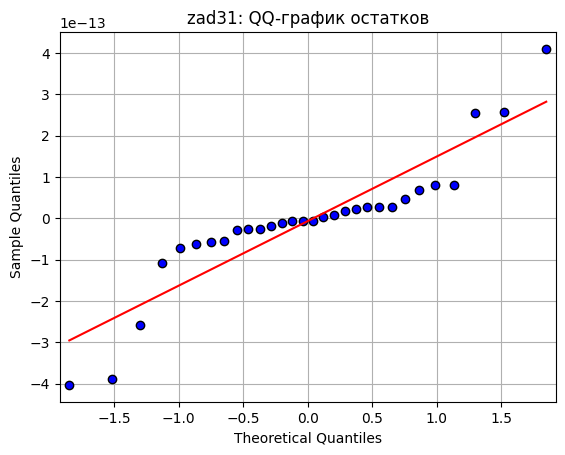

In [67]:
plt.figure(figsize=(10, 7))
sm.qqplot(residuals_zad31, line='s', marker='o', markerfacecolor='blue', markeredgecolor='black')
plt.title('zad31: QQ-график остатков')
plt.grid(True)
plt.savefig('../fig/zad31_qq_plot.png', dpi=300)

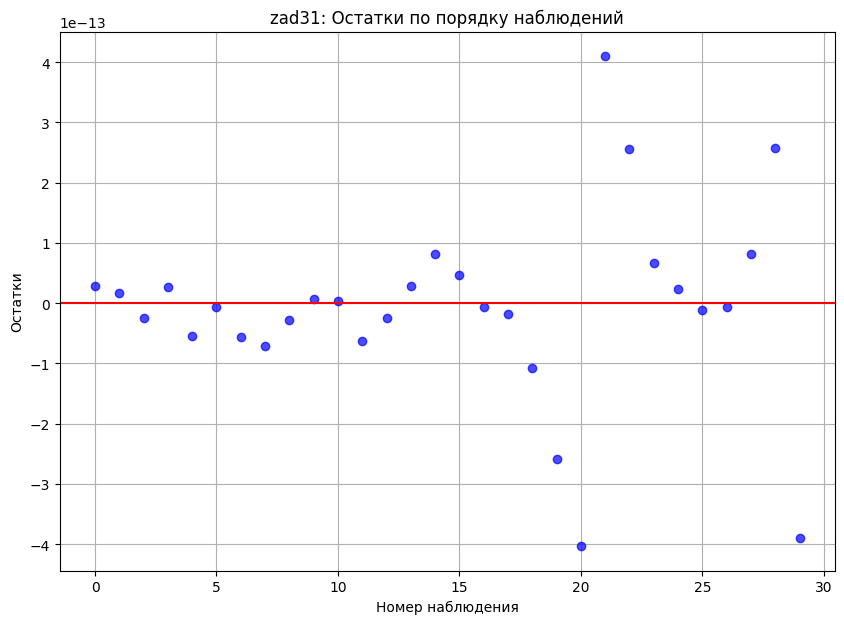

In [68]:
plt.figure(figsize=(10, 7))
plt.plot(residuals_zad31, marker='o', linestyle='', color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Номер наблюдения')
plt.ylabel('Остатки')
plt.title('zad31: Остатки по порядку наблюдений')
plt.grid(True)
plt.savefig('../fig/zad31_residuals_order.png', dpi=300)

# Анализ для zad32

In [69]:
df_zad32 = pd.read_csv('ident_lab1/zad32_data.csv')
x_cols = [f'x_{i}' for i in range(1, 31)]
y_cols = [f'y_{i}' for i in range(1, 31)]
x_zad32 = df_zad32[x_cols].values[0]
y_zad32 = df_zad32[y_cols].values[0]

In [70]:
ln_y_zad32 = np.log(y_zad32)
X_zad32 = sm.add_constant(x_zad32) 

In [71]:
model_zad32 = sm.OLS(ln_y_zad32, X_zad32).fit()
c, d = model_zad32.params
p1_zad32 = np.exp(c)
p2_zad32 = d
residuals_zad32 = model_zad32.resid
predicted_zad32 = model_zad32.predict(X_zad32)

print(f"c = {c:.2f}, d = {d:.2f}")

c = 1.95, d = -1.90


In [72]:
# Нулевое среднее ошибок: E(res) = 0
mean_residuals = np.mean(residuals_zad32)
t_stat, p_value = ttest_1samp(residuals_zad32, 0)
print(f"Проверка нулевого среднего ошибок (zad32):")
print(f"Среднее остатков: {mean_residuals:.6f}")
print(f"t-тест для среднего: t={t_stat:.4f}, p-value={p_value:.6f}")
if p_value > 0.05:
    print("Нет оснований отвергнуть нулевую гипотезу о нулевом среднем остатков (условие выполняется)\n")
else:
    print("Есть основания отвергнуть нулевую гипотезу о нулевом среднем остатков (условие не выполняется)\n")


Проверка нулевого среднего ошибок (zad32):
Среднее остатков: 0.000000
t-тест для среднего: t=0.2350, p-value=0.815847
Нет оснований отвергнуть нулевую гипотезу о нулевом среднем остатков (условие выполняется)



In [73]:
# Гомоскедастичность
bp_test = het_breuschpagan(residuals_zad32, X_zad32)
print(f"Проверка гомоскедастичности (zad32):")
print(f"Тест Бреуша-Пагана: statistic={bp_test[0]:.4f}, p-value={bp_test[1]:.4f}")
if bp_test[1] > 0.05:
    print("Нет оснований отвергнуть гипотезу о гомоскедастичности (условие выполняется)\n")
else:
    print("Есть основания отвергнуть гипотезу о гомоскедастичности (условие не выполняется)\n")

Проверка гомоскедастичности (zad32):
Тест Бреуша-Пагана: statistic=12.0790, p-value=0.0005
Есть основания отвергнуть гипотезу о гомоскедастичности (условие не выполняется)



In [74]:
# Отсутствие автокорреляции
dw_stat = sm.stats.durbin_watson(residuals_zad32)
lb_test = acorr_ljungbox(residuals_zad32, lags=[1], return_df=True)
print(f"Проверка автокорреляции (zad32):")
print(f"Статистика Дарбина-Уотсона: {dw_stat:.4f}")
print(f"Тест Льюнга-Бокса: LB-statistic={lb_test['lb_stat'].values[0]:.4f}, p-value={lb_test['lb_pvalue'].values[0]:.4f}")
if dw_stat > 1.5 and dw_stat < 2.5 and lb_test['lb_pvalue'].values[0] > 0.05:
    print("Нет признаков автокорреляции (условие выполняется)\n")
else:
    print("Есть признаки автокорреляции (условие не выполняется)\n")

Проверка автокорреляции (zad32):
Статистика Дарбина-Уотсона: 2.5197
Тест Льюнга-Бокса: LB-statistic=3.4834, p-value=0.0620
Есть признаки автокорреляции (условие не выполняется)



In [75]:
# Отсутствие мультиколлинеарности
vif = [variance_inflation_factor(X_zad32, i) for i in range(X_zad32.shape[1])]
print(f"Проверка мультиколлинеарности (zad32):")
print(f"VIF для константы: {vif[0]:.4f}, VIF для x: {vif[1]:.4f}")
if max(vif) < 10:
    print("Мультиколлинеарность отсутствует (условие выполняется)\n")
else:
    print("Есть мультиколлинеарность (условие не выполняется)\n")

Проверка мультиколлинеарности (zad32):
VIF для константы: 3.8065, VIF для x: 1.0000
Мультиколлинеарность отсутствует (условие выполняется)



In [76]:
# Нормальность остатков
shapiro_test = shapiro(residuals_zad32)
print(f"Проверка нормальности остатков (zad32):")
print(f"Тест Шапиро-Уилка: statistic={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}")
if shapiro_test[1] > 0.05:
    print("Остатки нормально распределены (условие выполняется)\n")
else:
    print("Остатки не нормально распределены (условие не выполняется)\n")

Проверка нормальности остатков (zad32):
Тест Шапиро-Уилка: statistic=0.9233, p-value=0.0327
Остатки не нормально распределены (условие не выполняется)



In [77]:
print("Проверка значимости коэффициентов (zad32):")
print(model_zad32.summary())
print("\n")

Проверка значимости коэффициентов (zad32):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.798e+30
Date:                Mon, 29 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:22:02   Log-Likelihood:                 955.73
No. Observations:                  30   AIC:                            -1907.
Df Residuals:                      28   BIC:                            -1905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

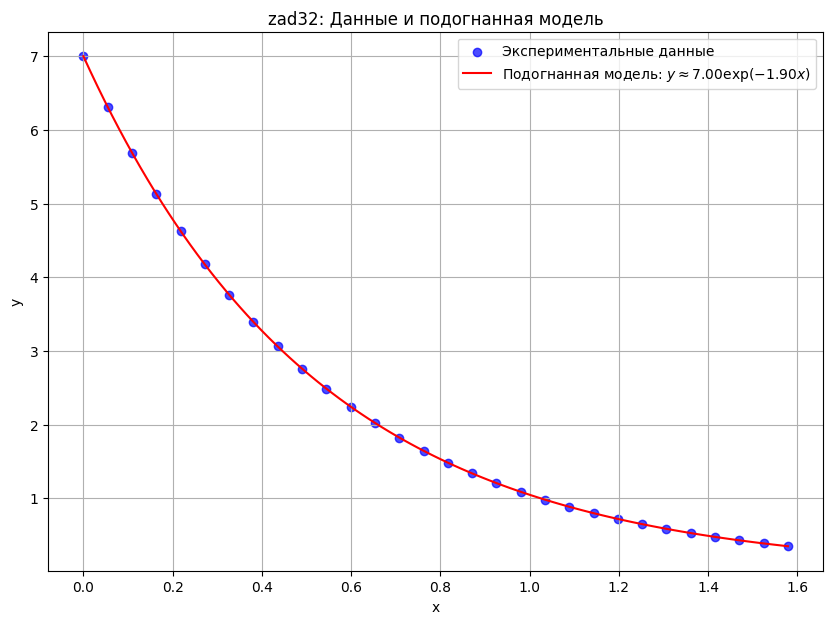

In [78]:
plt.figure(figsize=(10, 7))
x_smooth = np.linspace(min(x_zad32), max(x_zad32), 100)
y_fit = p1_zad32 * np.exp(p2_zad32 * x_smooth)
plt.scatter(x_zad32, y_zad32, label='Экспериментальные данные', color='blue', alpha=0.7)
plt.plot(x_smooth, y_fit, 'r-', 
         label=f'Подогнанная модель: $y \\approx {p1_zad32:.2f} \\exp({p2_zad32:.2f} x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('zad32: Данные и подогнанная модель')
plt.legend()
plt.grid(True)
plt.savefig('../fig/zad32_data_fit.png', dpi=300)



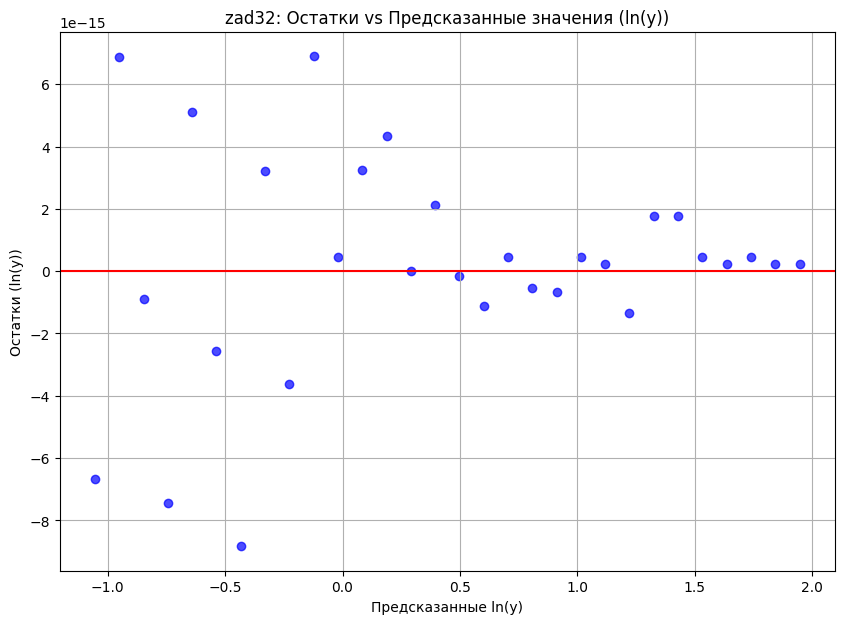

In [79]:
plt.figure(figsize=(10, 7))
plt.scatter(predicted_zad32, residuals_zad32, color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Предсказанные ln(y)')
plt.ylabel('Остатки (ln(y))')
plt.title('zad32: Остатки vs Предсказанные значения (ln(y))')
plt.grid(True)
plt.savefig('../fig/zad32_residuals_vs_predicted.png', dpi=300)


<Figure size 1000x700 with 0 Axes>

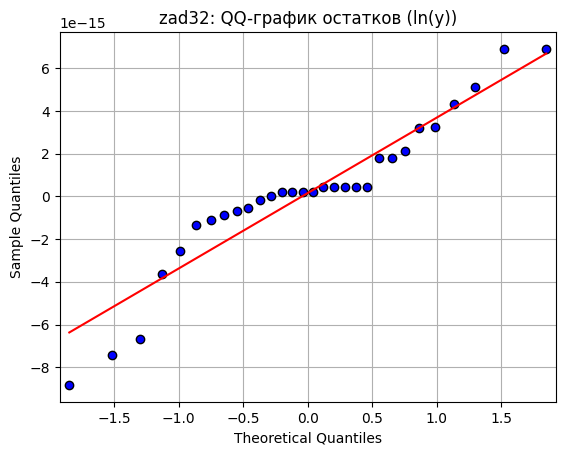

In [80]:
plt.figure(figsize=(10, 7))
sm.qqplot(residuals_zad32, line='s', marker='o', markerfacecolor='blue', markeredgecolor='black')
plt.title('zad32: QQ-график остатков (ln(y))')
plt.grid(True)
plt.savefig('../fig/zad32_qq_plot.png', dpi=300)

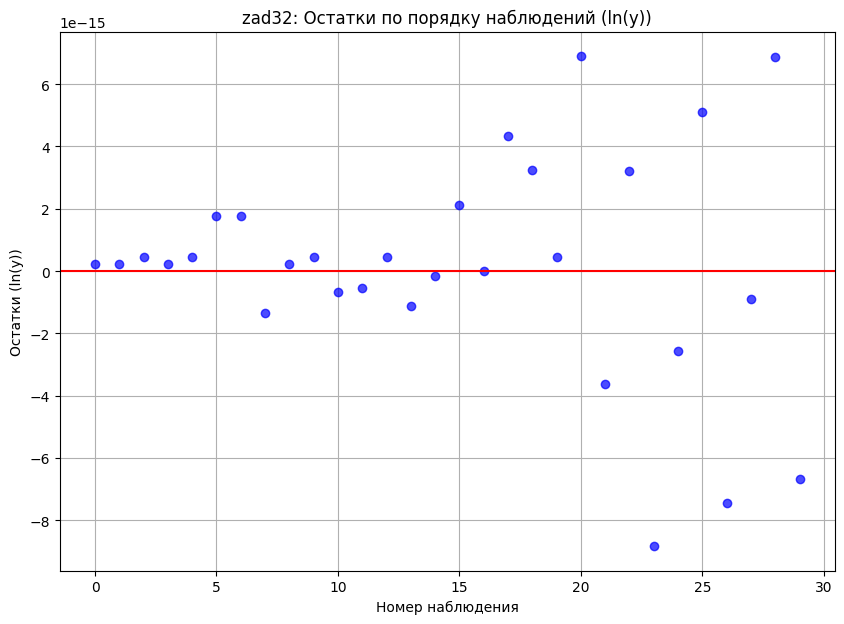

In [81]:
plt.figure(figsize=(10, 7))
plt.plot(residuals_zad32, marker='o', linestyle='', color='blue', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Номер наблюдения')
plt.ylabel('Остатки (ln(y))')
plt.title('zad32: Остатки по порядку наблюдений (ln(y))')
plt.grid(True)
plt.savefig('../fig/zad32_residuals_order.png', dpi=300)

Теперь в LaTEX. Запиши как было построена моедель линейной регрессии, почему именно такая. Формально с акцентом на стат методы и гипотезы запиши построение модели и оценку параметров с помощью метода максимального прадободобия оценку параметров для каждой из функции и дальшей проверку гипотезу. Необходимо использовать в начале \begin{task} Для формулировки задания, внутри если появляется какое-то очень важное замечание, то \begin{remark} и в конце ответ в \begin{answer}. Текст должен быть насыщен статистиской, теорией вероятности, линейной алгеброй, текст должен быть написан очень формально.

Ответ оформи в блоке кода LaTEX